## Clusterização com dataset sintético MakeBlobs

In [1]:
# Importação Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Data Set
from sklearn.datasets import make_blobs

In [3]:
# Criando um dataset com 300 amostras, 2 características e 4 centros (clusters)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


In [4]:
# Transformando em um DataFrame para facilitar a manipulação
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [5]:
df.head()

,Feature_1,Feature_2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [6]:
df.describe()

,Feature_1,Feature_2
count,300.000000,300.000000
mean,-0.006328,3.967821
std,1.636000,2.593963
min,-3.122407,-0.765892
25%,-1.498837,1.916025
50%,-0.044497,3.529012
75%,1.433350,5.607633
max,3.437618,9.282932


In [7]:
# Como o K-Means é sensível à escala dos dados, vamos padronizar as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [8]:
# Determinar o número ideal de clusters usando o método do cotovelo
wcss = []  # Within-cluster sum of squares


In [9]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\pietr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pietr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


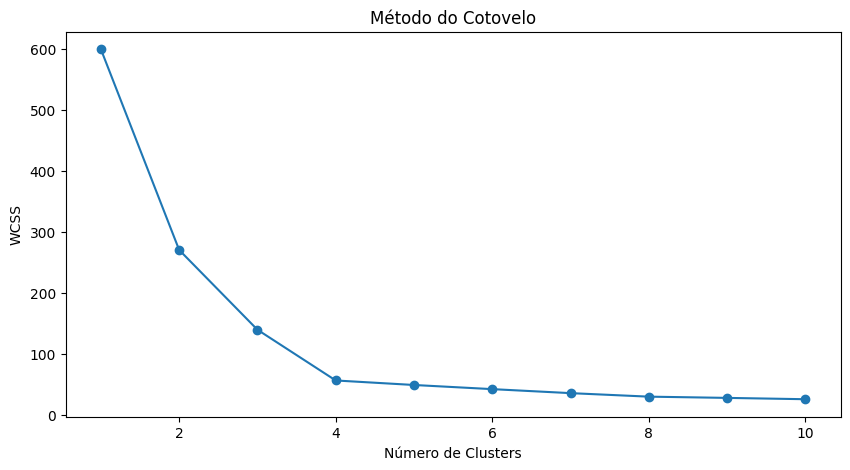

In [10]:
# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Escolher o número de clusters com base no gráfico do cotovelo
optimal_clusters = 4

In [12]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

In [13]:
# Calcular o índice de silhueta
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Índice de Silhueta para {optimal_clusters} clusters: {silhouette_avg}")

Índice de Silhueta para 4 clusters: 0.6569234398199433


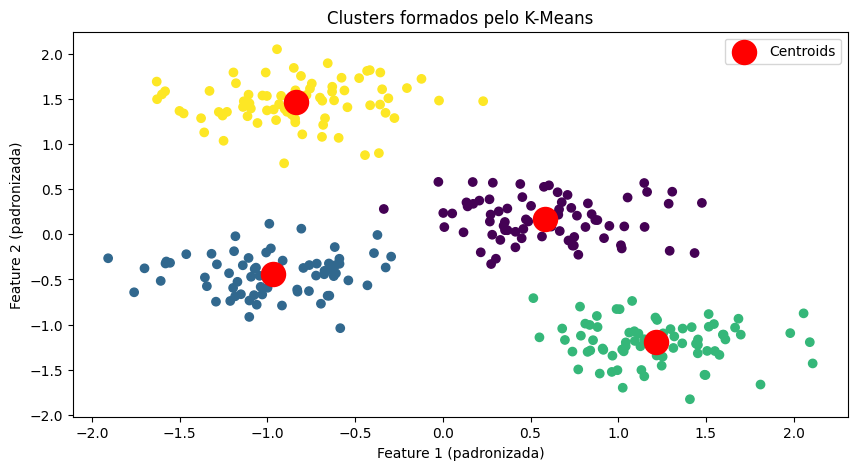

In [14]:
# Visualizar os clusters
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters formados pelo K-Means')
plt.xlabel('Feature 1 (padronizada)')
plt.ylabel('Feature 2 (padronizada)')
plt.legend()
plt.show()